Height values:[96 63 17 20 47 17 99 94 63 41 80 67  0 94  2 87 72 13 13 89]


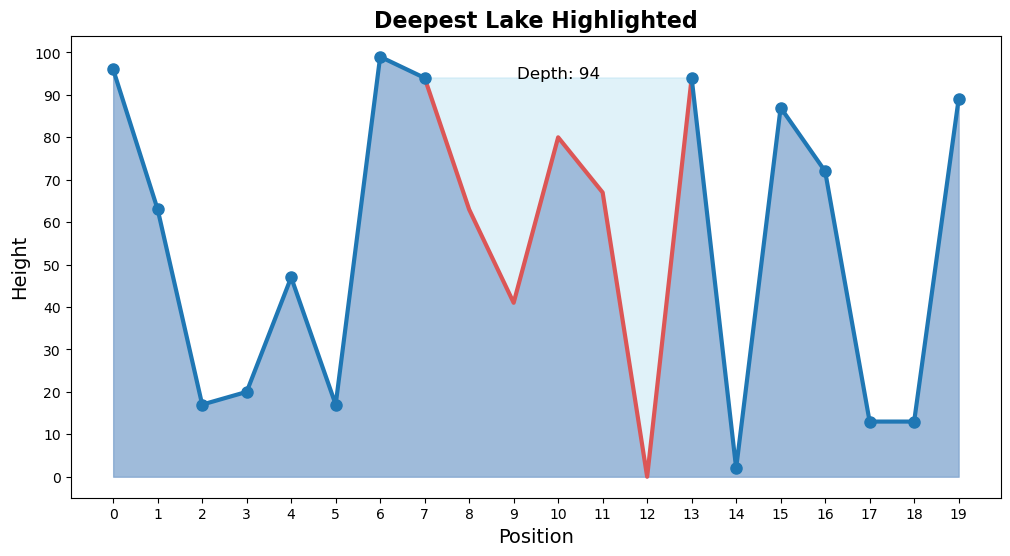

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random sequence
seq = np.random.randint(0, 101, size=20)
print(f'Height values:{seq}')


# Deepest "lake" search function
def find_deepest_lake(heights):
    max_depth = 0
    best_i, best_j = None, None

    for i in np.arange(len(heights)):
        # "Lake" requires at least three values
        for j in np.arange(i + 2, len(heights)):
            inner = heights[i+1:j]  # Values between peaks
            # Check for empty list and peaks are the highest points
            if inner.size > 0 and np.all(inner < np.minimum(heights[i], heights[j])):
                # Find the depth of the "lake"
                depth = np.minimum(heights[i], heights[j]) - np.min(inner)
                if depth > max_depth:     # Update variables at a greater depth
                    max_depth = depth
                    best_i, best_j = i, j

    return best_i, best_j, max_depth


best_i, best_j, max_depth = find_deepest_lake(seq)

# "Water level" determination
waterline = np.minimum(seq[best_i], seq[best_j])
# Forming the "lake" coordinates
x_poly = np.concatenate(([best_i], np.arange(best_i + 1, best_j), [best_j]))
y_poly = np.concatenate(([waterline], seq[best_i + 1:best_j], [waterline]))
# Set the graph size
plt.figure(figsize=(12, 6))
# Fill the "lake" polygon
plt.fill(x_poly, y_poly, color='#87CEEB', alpha=0.25)
# Connecting "mountain peaks"
plt.plot(np.arange(best_i, best_j + 1),
         seq[best_i:best_j + 1], color='#dc5656', linewidth=3)
# Left part before the lake
plt.plot(np.arange(best_i + 1), seq[:best_i + 1], marker='o',
         linestyle='-', color='#1f77b4', markersize=8, linewidth=3)
# Right part after the lake
plt.plot(np.arange(best_j, 20), seq[best_j:], marker='o',
         linestyle='-', color='#1f77b4', markersize=8, linewidth=3)
# Fill the "mountains" polygon
plt.fill_between(np.arange(20), seq, color='#779ECB', alpha=0.7)
# Additional design
plt.text((best_i + best_j) / 2, (np.maximum(seq[best_i], seq[best_j])+1),
         f'Depth: {max_depth}', ha='center', va='center', fontsize=12)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Height', fontsize=14)
plt.title('Deepest Lake Highlighted', fontsize=16, fontweight='bold')
plt.yticks(np.arange(0, 110, 10))
plt.xticks(np.arange(0, 20, 1))
# Display the graph
plt.show()